# 02_2.EDA(수치형 자료 분석)(연습문제)

## 1.package 설치

In [1]:
# 그래프에서 한글 폰트 인식하기
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

#  *** 세션 다시 시작

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 35 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 1s (8,022 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 121749 files and dire

In [ ]:
# 1.기본
import numpy as np  # numpy 패키지 가져오기
import matplotlib.pyplot as plt # 시각화 패키지 가져오기
import seaborn as sns # 시각화

# 2.데이터 가져오기
import pandas as pd # csv -> dataframe으로 전환

In [ ]:
# 테마 설정
sns.set_theme(style = "darkgrid")

# 한글 인식
plt.rc('font', family='NanumBarunGothic')
plt.rcParams['axes.unicode_minus'] = False # -인식

## 2.데이터 불러오기

### 2.1 데이터 프레임으로 저장
- 원본데이터(csv)를 dataframe 형태로 가져오기(pandas)

In [ ]:
url = "https://raw.githubusercontent.com/leecho-bigdata/statistics-python/main/01_2.OnlineGame.csv"
online_df = pd.read_csv(url, encoding="cp949")
online_df.head(10)

,no,성별,결혼,학력,연령,도구,보상,정보,디자인,공동체,몰입,충성도
0,1,1,2,3,18,2,7,6,12,12,8,6
1,2,2,2,2,22,2,8,3,11,6,4,4
2,3,2,2,2,26,2,8,7,14,18,12,9
3,4,1,2,4,34,2,8,7,18,15,4,7
4,5,1,2,4,28,2,9,8,16,23,14,11
5,6,1,2,2,26,2,9,9,24,24,16,12
6,7,1,2,1,30,2,10,8,12,17,11,8
7,8,2,1,2,25,2,10,8,19,21,12,10
8,9,2,2,3,21,2,12,3,10,6,4,3
9,10,1,1,3,31,3,5,8,23,18,9,9


### 2.2 자료구조 살펴보기

In [ ]:
online_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 376 entries, 0 to 375
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   no      376 non-null    int64
 1   성별      376 non-null    int64
 2   결혼      376 non-null    int64
 3   학력      376 non-null    int64
 4   연령      376 non-null    int64
 5   도구      376 non-null    int64
 6   보상      376 non-null    int64
 7   정보      376 non-null    int64
 8   디자인     376 non-null    int64
 9   공동체     376 non-null    int64
 10  몰입      376 non-null    int64
 11  충성도     376 non-null    int64
dtypes: int64(12)
memory usage: 35.4 KB


In [ ]:
online_df.shape

(376, 12)

In [ ]:
online_df.dtypes

no     int64
성별     int64
결혼     int64
학력     int64
연령     int64
도구     int64
보상     int64
정보     int64
디자인    int64
공동체    int64
몰입     int64
충성도    int64
dtype: object

### 2.3 범주형 변수 처리
- 가변수 처리시 문자로 처리를 해야 변수명 구분이 쉬움

In [ ]:
online_df['성별'] = online_df['성별'].replace ([1,2], ['남자','여자'])
online_df['결혼'].replace({1:'결혼', 2:'미혼'}, inplace=True)
online_df['학력'].replace({1:'초중고생', 2:'고졸', 3:'대학생', 4:'대졸'}, inplace=True)

online_df.head()

,no,성별,결혼,학력,연령,도구,보상,정보,디자인,공동체,몰입,충성도
0,1,남자,미혼,대학생,18,2,7,6,12,12,8,6
1,2,여자,미혼,고졸,22,2,8,3,11,6,4,4
2,3,여자,미혼,고졸,26,2,8,7,14,18,12,9
3,4,남자,미혼,대졸,34,2,8,7,18,15,4,7
4,5,남자,미혼,대졸,28,2,9,8,16,23,14,11


In [ ]:
online_df.dtypes

no      int64
성별     object
결혼     object
학력     object
연령      int64
도구      int64
보상      int64
정보      int64
디자인     int64
공동체     int64
몰입      int64
충성도     int64
dtype: object

In [ ]:
# datatype을 categroy로 변경
online_df['성별'] = online_df['성별'].astype('category')
online_df['결혼'] = online_df['결혼'].astype('category')
online_df['학력'] = online_df['학력'].astype('category')

## 3.수치형 변수(1개) (one numerical)

### 3.1 기술통계

In [ ]:
# 기술통계 사용 함수
print(online_df.충성도.count())
print(online_df.충성도.mean())
print(online_df.충성도.std())
print(online_df.충성도.min())
print(online_df.충성도.quantile(0.25))
print(online_df.충성도.quantile(0.50))
print(online_df.충성도.quantile(0.75))
print(online_df.충성도.max())
print(online_df.충성도.median())
print(online_df.충성도.mode().values[0])
print(online_df.충성도.skew())
print(online_df.충성도.kurtosis())

376
10.22340425531915
1.7808118317615267
3
9.0
10.0
11.0
15
10.0
9
-0.277817190173606
1.5167933644281764


In [ ]:
# 필요한 변수 1개 선택
# describe() 사용
online_df.충성도.describe()

count    376.000000
mean      10.223404
std        1.780812
min        3.000000
25%        9.000000
50%       10.000000
75%       11.000000
max       15.000000
Name: 충성도, dtype: float64

In [ ]:
# table로 저장
충성도_df = pd.DataFrame(online_df.충성도.describe()).T
충성도_df

,count,mean,std,min,25%,50%,75%,max
충성도,376.0,10.223404,1.780812,3.0,9.0,10.0,11.0,15.0


In [ ]:
# 필요한 통계수치 추가
충성도_df["skew"] = online_df.충성도.skew()
충성도_df["kurtosis"] = online_df.충성도.kurtosis()
충성도_df

,count,mean,std,min,25%,50%,75%,max,skew,kurtosis
충성도,376.0,10.223404,1.780812,3.0,9.0,10.0,11.0,15.0,-0.277817,1.516793


In [ ]:
# agg 이용해서 필요한 항목만 추출
online_df.agg({"충성도": ["count", "mean", "std", "min", "max", "median", "skew", "kurtosis"]}).T

,count,mean,std,min,max,median,skew,kurtosis
충성도,376.0,10.223404,1.780812,3.0,15.0,10.0,-0.277817,1.516793


### 3.2 그래프 그리기
- histogram, boxplot

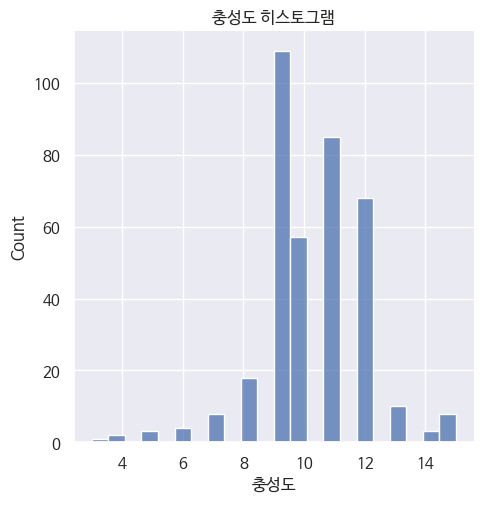

In [ ]:
# histplot
g = sns.displot(data = online_df,
                x = "충성도",
                # binwidth = 10,
                kind = "hist")
g.set(title = "충성도 히스토그램")
plt.show()

## 4.이상치 제거

### 4.1 이상치 확인

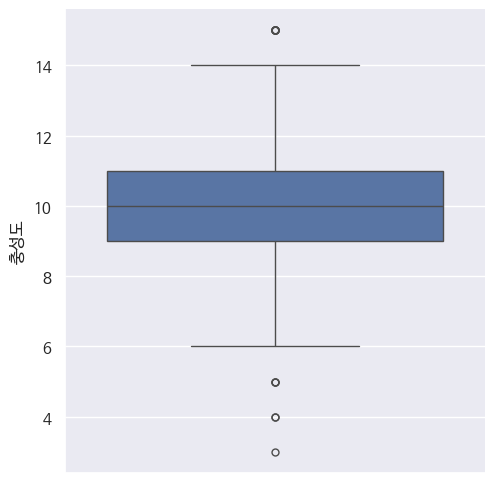

In [ ]:
sns.catplot(y = "충성도",
                kind = "box",
                data = online_df)
plt.show()

In [ ]:
filter = (online_df["충성도"] <= 5.5)
online_df.loc[filter]

,no,성별,결혼,학력,연령,도구,보상,정보,디자인,공동체,몰입,충성도
1,2,여자,미혼,고졸,22,2,8,3,11,6,4,4
8,9,여자,미혼,대학생,21,2,12,3,10,6,4,3
13,14,남자,미혼,초중고생,32,4,4,7,14,10,4,4
21,22,남자,미혼,고졸,17,4,8,6,12,18,8,5
52,53,여자,미혼,대학생,21,5,6,6,15,13,8,5
54,55,여자,미혼,고졸,17,5,6,9,9,7,10,5


### 4.2 이상치 제거

In [ ]:
online_df.drop(online_df[filter].index, inplace = True)

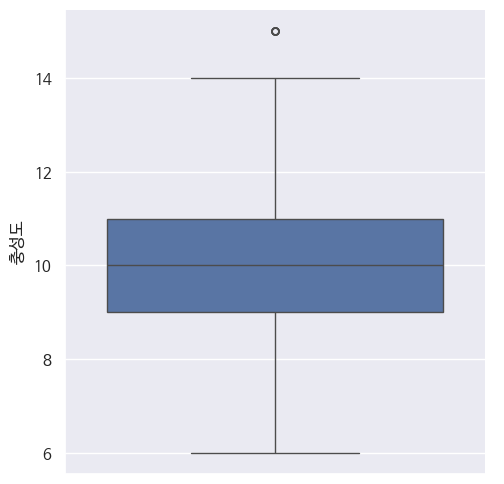

In [ ]:
sns.catplot(y = "충성도",
                kind = "box",
                data = online_df)
plt.show()

## 5.수치형 변수를 범주형으로 변환
- 예제: 50세
- [ : <= , >=
- ( : < , >
- right = False: 45 <= x < 50 (~미만) [50, 55)
- right = True(default): 45 < x <= 50 (~이하) (45, 50]

### 5.1 범위 확인

In [ ]:
pd.cut(x = online_df['연령'], bins = 4) \
       .value_counts()

(20.75, 30.5]      223
(30.5, 40.25]       73
(10.961, 20.75]     57
(40.25, 50.0]       17
Name: 연령, dtype: int64

### 5.2 범주형 변환후 저장

In [ ]:
bins = [0, 20, 30, 40, 100]
online_df['연령_bin'] = pd.cut(x = online_df['연령'],
                               bins = bins,
                               right = False)
online_df.head(10)

,no,성별,결혼,학력,연령,도구,보상,정보,디자인,공동체,몰입,충성도,연령_bin
0,1,남자,미혼,대학생,18,2,7,6,12,12,8,6,"[0, 20)"
2,3,여자,미혼,고졸,26,2,8,7,14,18,12,9,"[20, 30)"
3,4,남자,미혼,대졸,34,2,8,7,18,15,4,7,"[30, 40)"
4,5,남자,미혼,대졸,28,2,9,8,16,23,14,11,"[20, 30)"
5,6,남자,미혼,고졸,26,2,9,9,24,24,16,12,"[20, 30)"
6,7,남자,미혼,초중고생,30,2,10,8,12,17,11,8,"[30, 40)"
7,8,여자,결혼,고졸,25,2,10,8,19,21,12,10,"[20, 30)"
9,10,남자,결혼,대학생,31,3,5,8,23,18,9,9,"[30, 40)"
10,11,남자,결혼,대졸,25,3,8,6,12,20,12,8,"[20, 30)"
11,12,남자,미혼,고졸,30,3,10,8,16,9,10,7,"[30, 40)"


In [ ]:
bins = [0, 20, 30, 40, 100]
label = ["~19", "20~29", "30~39", "40~"]
online_df['연령_c'] = pd.cut(x = online_df['연령'],
                            bins = bins,
                            labels = label,
                            right = False)
online_df.head(10)

,no,성별,결혼,학력,연령,도구,보상,정보,디자인,공동체,몰입,충성도,연령_bin,연령_c
0,1,남자,미혼,대학생,18,2,7,6,12,12,8,6,"[0, 20)",~19
2,3,여자,미혼,고졸,26,2,8,7,14,18,12,9,"[20, 30)",20~29
3,4,남자,미혼,대졸,34,2,8,7,18,15,4,7,"[30, 40)",30~39
4,5,남자,미혼,대졸,28,2,9,8,16,23,14,11,"[20, 30)",20~29
5,6,남자,미혼,고졸,26,2,9,9,24,24,16,12,"[20, 30)",20~29
6,7,남자,미혼,초중고생,30,2,10,8,12,17,11,8,"[30, 40)",30~39
7,8,여자,결혼,고졸,25,2,10,8,19,21,12,10,"[20, 30)",20~29
9,10,남자,결혼,대학생,31,3,5,8,23,18,9,9,"[30, 40)",30~39
10,11,남자,결혼,대졸,25,3,8,6,12,20,12,8,"[20, 30)",20~29
11,12,남자,미혼,고졸,30,3,10,8,16,9,10,7,"[30, 40)",30~39


### 5.3 그래프 그리기

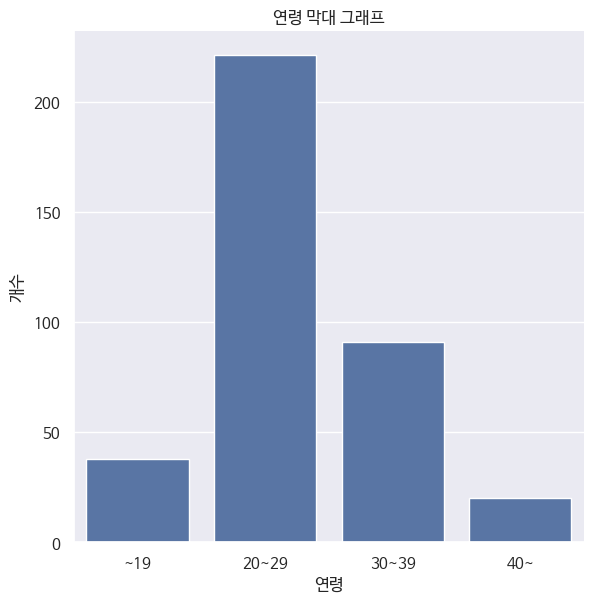

In [ ]:
# 범주형 변수(막대그래프)
g = sns.catplot(data = online_df,
                height = 6,
                x = "연령_c",
                kind = "count")
g.set(title = "연령 막대 그래프",
      xlabel = "연령",
      ylabel = "개수")
plt.show()

## 6.수치형 1개 + 범주형 1개

### 6.1 기술통계(그룹별)

In [ ]:
# 그룹별 분석
online_df.groupby('성별')["충성도"].mean().T.round(2)

성별
남자    10.15
여자    10.46
Name: 충성도, dtype: float64

In [ ]:
online_df.groupby('성별')["충성도"].describe().round(2)

,count,mean,std,min,25%,50%,75%,max
성별,,,,,,,,
남자,165.0,10.15,1.61,6.0,9.0,10.0,11.0,14.0
여자,205.0,10.46,1.63,6.0,9.0,11.0,11.0,15.0


In [ ]:
online_df.groupby('성별') \
    .agg({"충성도": ["count", "mean", "std", "min", "max", "median", "skew"]}) \
    .round(2) # groupby에서는 kurtosis 지원x

충성도                                  
   count   mean   std min max median  skew
성별                                        
남자   165  10.15  1.61   6  14   10.0 -0.08
여자   205  10.46  1.63   6  15   11.0  0.55

### 6.2 그래프 그리기

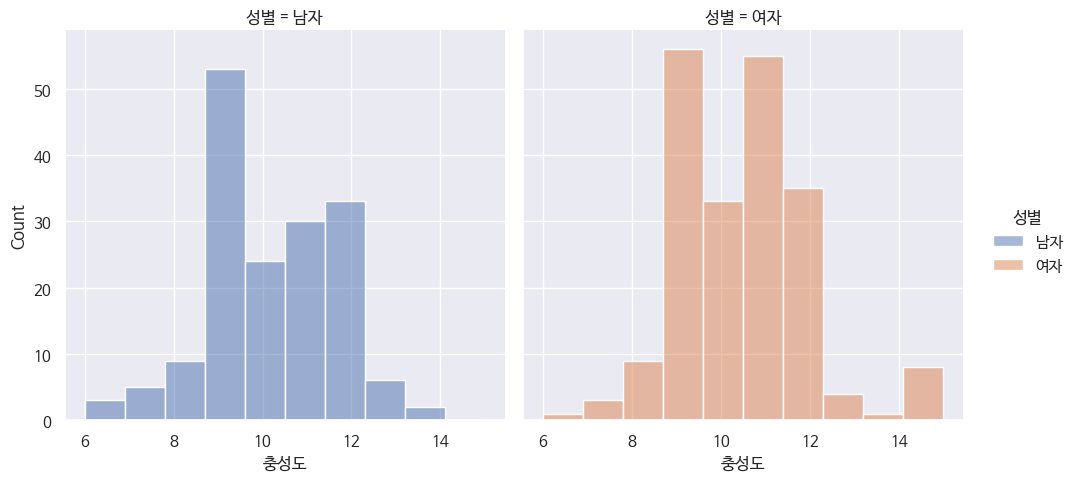

In [ ]:
# 범주형 변수로 구분
sns.displot(data = online_df,
            x = "충성도",
            bins = 10,
            hue = "성별",
            col ="성별",
            kind = "hist")
plt.show()

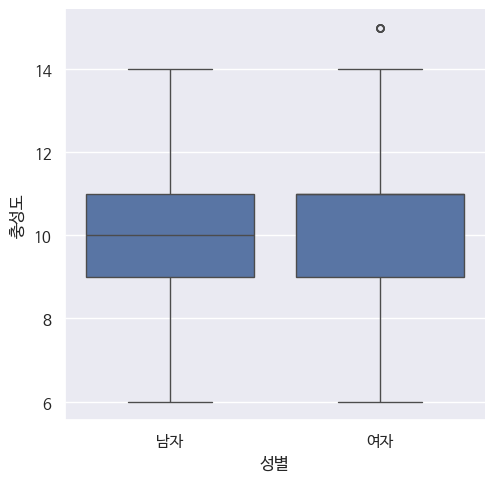

In [ ]:
sns.catplot(data = online_df,
            x = "성별",
            y = "충성도",
            kind = "box")
plt.show()

## 7.다중 수치형 변수(multi numerical variables)

### 7.1 다중 수치형 변수 기술통계

In [ ]:
# pd.describe 이용: 수치형 자료만 분석
online_df.describe()

,no,연령,도구,보상,정보,디자인,공동체,몰입,충성도
count,370.000000,370.000000,370.000000,370.000000,370.000000,370.000000,370.000000,370.000000,370.000000
mean,191.137838,26.727027,6.272973,10.543243,8.967568,19.051351,19.527027,12.791892,10.318919
std,107.519683,6.935520,1.502870,2.560810,1.822481,3.160574,2.960549,2.068591,1.624981
min,1.000000,11.000000,2.000000,4.000000,3.000000,8.000000,9.000000,4.000000,6.000000
25%,99.250000,23.000000,5.000000,9.000000,8.000000,17.000000,18.000000,12.000000,9.000000
50%,191.500000,26.000000,6.000000,11.000000,9.000000,19.000000,19.000000,13.000000,10.000000
75%,283.750000,30.000000,8.000000,12.000000,10.000000,21.000000,21.000000,14.000000,11.000000
max,376.000000,50.000000,10.000000,18.000000,15.000000,28.000000,29.000000,20.000000,15.000000


In [ ]:
# 범주형 변수까지 분석
online_df.describe(include = 'all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
no,370.0,NaN,NaN,NaN,191.137838,107.519683,1.0,99.25,191.5,283.75,376.0
성별,370,2,여자,205,NaN,NaN,NaN,NaN,NaN,NaN,NaN
결혼,370,2,미혼,269,NaN,NaN,NaN,NaN,NaN,NaN,NaN
학력,370,4,대졸,124,NaN,NaN,NaN,NaN,NaN,NaN,NaN
연령,370.0,NaN,NaN,NaN,26.727027,6.93552,11.0,23.0,26.0,30.0,50.0
도구,370.0,NaN,NaN,NaN,6.272973,1.50287,2.0,5.0,6.0,8.0,10.0
보상,370.0,NaN,NaN,NaN,10.543243,2.56081,4.0,9.0,11.0,12.0,18.0
정보,370.0,NaN,NaN,NaN,8.967568,1.822481,3.0,8.0,9.0,10.0,15.0
디자인,370.0,NaN,NaN,NaN,19.051351,3.160574,8.0,17.0,19.0,21.0,28.0
공동체,370.0,NaN,NaN,NaN,19.527027,2.960549,9.0,18.0,19.0,21.0,29.0


In [ ]:
# 필요한 변수만 선택
online_df.columns

Index(['no', '성별', '결혼', '학력', '연령', '도구', '보상', '정보', '디자인', '공동체', '몰입',
       '충성도', '연령_bin', '연령_c'],
      dtype='object')

In [ ]:
num_feature = ['도구', '보상', '정보', '디자인', '공동체', '몰입']
online_df[num_feature].describe().T.round(2)

,count,mean,std,min,25%,50%,75%,max
도구,370.0,6.27,1.50,2.0,5.0,6.0,8.0,10.0
보상,370.0,10.54,2.56,4.0,9.0,11.0,12.0,18.0
정보,370.0,8.97,1.82,3.0,8.0,9.0,10.0,15.0
디자인,370.0,19.05,3.16,8.0,17.0,19.0,21.0,28.0
공동체,370.0,19.53,2.96,9.0,18.0,19.0,21.0,29.0
몰입,370.0,12.79,2.07,4.0,12.0,13.0,14.0,20.0


In [ ]:
# agg 이용해서 필요한 항목만 추출
online_df[num_feature].agg(["count", "mean", "std", "min", "max", "median", "skew", "kurtosis"]).T.round(3)

,count,mean,std,min,max,median,skew,kurtosis
도구,370.0,6.273,1.503,2.0,10.0,6.0,-0.266,0.174
보상,370.0,10.543,2.561,4.0,18.0,11.0,0.017,-0.029
정보,370.0,8.968,1.822,3.0,15.0,9.0,0.019,0.184
디자인,370.0,19.051,3.161,8.0,28.0,19.0,-0.086,0.424
공동체,370.0,19.527,2.961,9.0,29.0,19.0,0.008,0.301
몰입,370.0,12.792,2.069,4.0,20.0,13.0,0.076,1.620


### 7.2 그룹별 기술통계

In [ ]:
# 그룹별 분석
online_df.groupby('성별')[num_feature].mean().T.round(2)

성별,남자,여자
도구,6.29,6.26
보상,10.50,10.58
정보,8.83,9.08
디자인,18.99,19.10
공동체,19.58,19.49
몰입,12.59,12.95


In [ ]:
online_df.groupby('성별')[num_feature].describe().round(2)

도구                                           보상         ...   공동체  \
    count  mean   std  min  25%  50%  75%   max  count   mean  ...   75%   
성별                                                             ...         
남자  165.0  6.29  1.61  2.0  6.0  6.0  8.0  10.0  165.0  10.50  ...  22.0   
여자  205.0  6.26  1.41  2.0  5.0  6.0  7.0  10.0  205.0  10.58  ...  21.0   

             몰입                                            
     max  count   mean   std  min   25%   50%   75%   max  
성별                                                         
남자  28.0  165.0  12.59  2.08  4.0  11.0  12.0  14.0  19.0  
여자  29.0  205.0  12.95  2.05  6.0  12.0  13.0  14.0  20.0  

[2 rows x 48 columns]

In [ ]:
online_df.groupby('성별')[num_feature].agg(["count", "mean", "std", "min", "max", "median", "skew"]).round(3)

도구                                        보상                 ... 공동체  \
   count   mean    std min max median   skew count    mean    std  ... max   
성별                                                                 ...       
남자   165  6.291  1.612   2  10    6.0 -0.430   165  10.503  2.691  ...  28   
여자   205  6.259  1.413   2  10    6.0 -0.078   205  10.576  2.458  ...  29   

                    몰입                                       
   median   skew count    mean    std min max median   skew  
성별                                                           
남자   20.0 -0.184   165  12.594  2.077   4  19   12.0 -0.180  
여자   19.0  0.205   205  12.951  2.053   6  20   13.0  0.296  

[2 rows x 42 columns]

In [ ]:
for num in num_feature:
    print("----", num, "----")
    results = online_df.groupby('성별')[num].describe().round(2)
    print(results, "\n")

---- 도구 ----
    count  mean   std  min  25%  50%  75%   max
성별                                             
남자  165.0  6.29  1.61  2.0  6.0  6.0  8.0  10.0
여자  205.0  6.26  1.41  2.0  5.0  6.0  7.0  10.0 

---- 보상 ----
    count   mean   std  min  25%   50%   75%   max
성별                                                
남자  165.0  10.50  2.69  5.0  8.0  11.0  12.0  17.0
여자  205.0  10.58  2.46  4.0  9.0  11.0  12.0  18.0 

---- 정보 ----
    count  mean   std  min  25%  50%   75%   max
성별                                              
남자  165.0  8.83  1.88  3.0  8.0  9.0  10.0  15.0
여자  205.0  9.08  1.78  3.0  8.0  9.0  10.0  13.0 

---- 디자인 ----
    count   mean   std  min   25%   50%   75%   max
성별                                                 
남자  165.0  18.99  3.16  8.0  17.0  19.0  21.0  28.0
여자  205.0  19.10  3.17  9.0  17.0  19.0  22.0  28.0 

---- 공동체 ----
    count   mean   std   min   25%   50%   75%   max
성별                                                  
남자  165.0  19.58  3

### 7.3 그래프 그리기

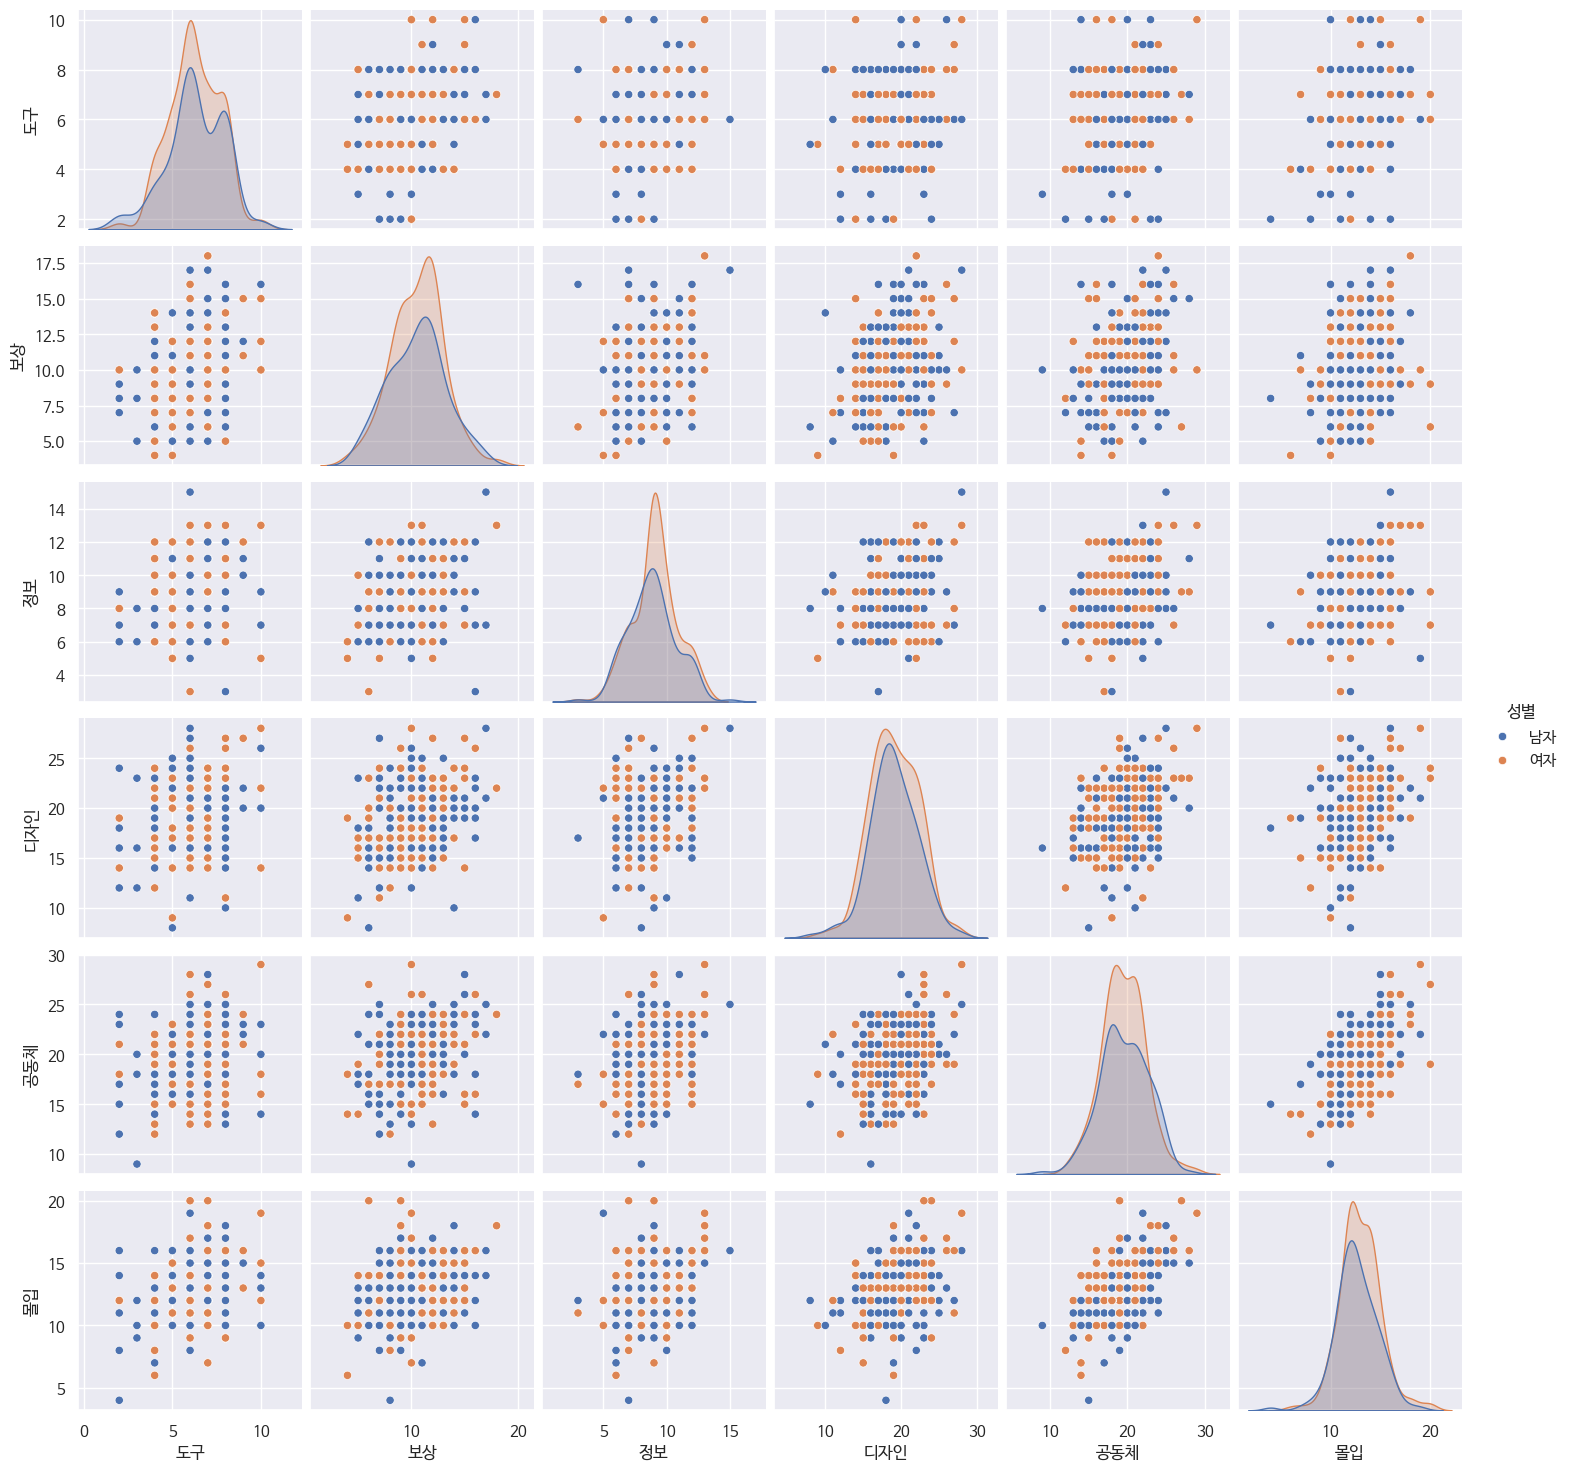

In [ ]:
sns.pairplot(vars = num_feature,
             hue = "성별",
             data = online_df)
plt.show()

## 8.평균

### 8.1 가중평균

In [ ]:
가중평균 = [(30,90), (30,95),(40,93)]
sum = 0
n = 0
for i,j in 가중평균:
    sum = sum+(i*j)
    n = i+n
    weighted_mean = sum/n

weighted_mean

92.7

### 8.2 조화평균

In [ ]:
import statistics as st

cagr = [120/100, 110/120, 150/110]
st.geometric_mean(cagr)-1

0.14471424255333187

In [ ]:
cagr = [120/100, 110/120, 150/110]
np.power(150/100, 1/3)-1

0.14471424255333187

### 8.3 조화평균

In [ ]:
import statistics as st

harmonic = [500, 300]

st.harmonic_mean(harmonic)

375.0

In [ ]:
harmonic = 680/((340/500)+(340/300))
harmonic

375.0